# Normal Distribution

#### Normal distribution is the most common and useful continuous distributon.It is also called Gaussian Distribution in Statistics or Probability.

#### It is charaterised by a symmetric bell-shaped curve having two parameters - mean(μ) and standard deviation(σ) 


#### Properties
 1. ***Curve:***  The curve is bell-shaped, indicating that most of the observations cluster around the central peak and the probabilities for values further away from the mean taper off equally in both directions.
 2. ***Symmetry:***  The normal distribution is symmetric around its mean. This means the left side of the distribution mirrors the right side.
 3. ***Mean, Median, and Mode:*** In a normal distribution, the mean, median, and mode are all equal and located at the center of the distribution.
 4. ***Standard Deviation:*** The spread of the distribution is determined by the standard deviation. About 68% of the data falls within 1 standard deviation of the mean, 95% within 2 standard deviations, and 99.7% within 3 standard deviations.


#### Problem statement
A testing agency wants to analyze the complexity of SAT Exam 2020. They have collected the SAT scores of 1000 students in "sat_score.csv". Let's answer some of the questions that will help to decide the complexity of SAT exam 2020.

 

1. Calculate the probability that a student will score less than 800 in SAT exam.
2. Calculate the probability that a student will score more than 1300 in SAT exam.
3. Calculate the minimum marks a student must score to secure the 90th percentile.
4. Calculate the minimum marks a student must score to be in the top 5%.

In [2]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations
%matplotlib inline

import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions

In [3]:
score = pd.read_csv('sat_score.csv')
score.head()

,student_id,score
0,1,1018
1,2,1218
2,3,611
3,4,723
4,5,541


#### Calculate mean and standard deviation for further calculations

In [6]:
# import norm from scipy
from scipy.stats import norm

mu = score['score'].mean()
sigma = score['score'].std()
print('The estimated mean is', round(mu,2))
print('The estimated standard deviation is', round(sigma,2))

The estimated mean is 1007.46
The estimated standard deviation is 204.43


#### Plotting the distribution

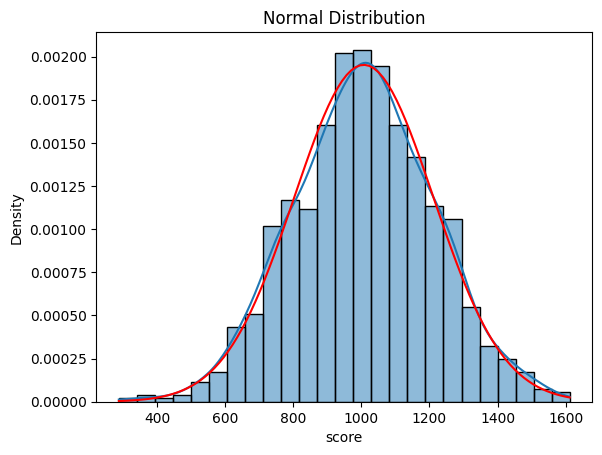

In [20]:
density = pd.DataFrame() # empty dataframe
density['x'] = np.linspace(score['score'].min(), score['score'].max(), 100) # array of 100 between min scorre and max score
density['pdf'] = norm.pdf(density['x'], mu, sigma) # calculate the pdf() of the created array and store in new column

# create subplot
fig, ax = plt.subplots()
sns.histplot(score['score'], ax=ax, kde=True, stat='density')
ax.plot(density['x'], density['pdf'], color='red')
plt.title('Normal Distribution')
plt.show()

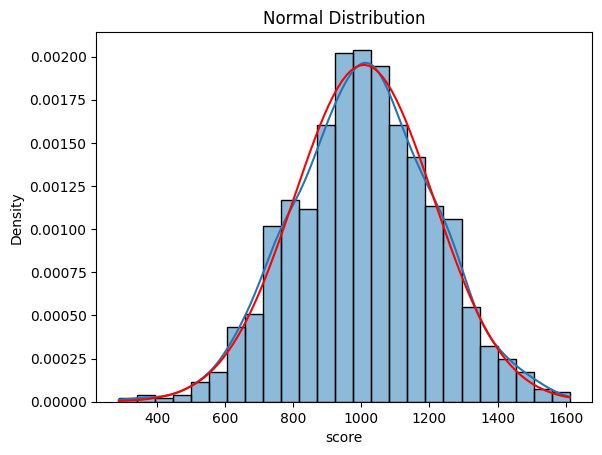

In [21]:
# calculate pdf using norm.pdf()
density = pd.DataFrame()
density['x'] = np.linspace(score['score'].min() -0.01, score['score'].max()+0.01, 100)
density['pdf'] = norm.pdf(density['x'], mu,sigma)

fig,ax=plt.subplots()
sns.histplot(score['score'], ax=ax, kde=True, stat='density')
ax.plot(density['x'], density['pdf'], color='red')
plt.title('Normal Distribution')
plt.show()

Data is applorximately normal.
X ~ N (mu, sigma)

#### Q1. Calculate the probability that a student will score less than 800 in SAT exam.

In [24]:
# P(X<800) we use norm.cdf()
prob_less_than_800 = norm.cdf(x=800, loc=mu, scale=sigma)
print(
    "The probability that a student will score less than 800 is",
    round(prob_less_than_800, 4),
)

The probability that a student will score less than 800 is 0.1551


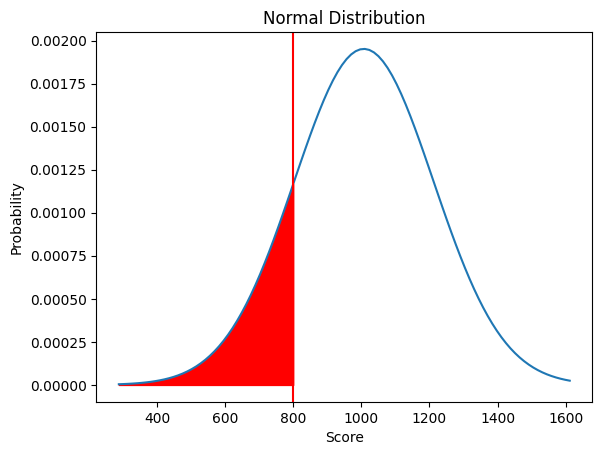

In [32]:
# Plot the distribution
plt.plot(density['x'], density['pdf'])
plt.axvline(x=800, c='r')
x1= np.linspace(density['x'].min(), 800, 50)
plt.fill_between(x1, norm.pdf(x1,mu,sigma), color='r')
plt.xlabel('Score')
plt.ylabel('Probability')
plt.title('Normal Distribution')
plt.show()

#### Q2. Calculate the probability that a student will score more than 1300 in SAT exam.

In [33]:
# P(X>1300), we need norm.cdf(), P(X>1300) =  1 - P(X<1300)
prob_greater_than_1300 = 1 - norm.cdf(1300, mu, sigma)
print(
    "The probability that a student will score more than 1300 is",
    round(prob_greater_than_1300, 4),
)

The probability that a student will score more than 1300 is 0.0762


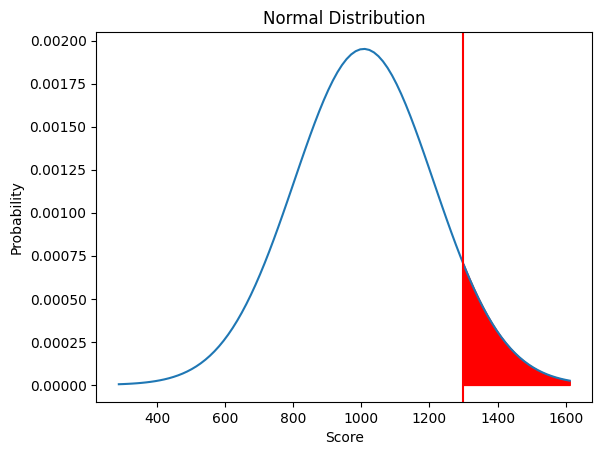

In [35]:
# plot the distribution
plt.plot(density['x'], density['pdf'])
plt.axvline(x=1300, c='r')
x1 = np.linspace(1300, density['x'].max(), 50)
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color='r')
plt.xlabel('Score')
plt.ylabel('Probability')
plt.title('Normal Distribution')
plt.show()

#### Q3. Calculate the minimum marks a student must score to secure the 90th percentile.

In [38]:
score_90th_percentile = norm.ppf(0.90, mu, sigma)
print("The 90th percentile score should be", round(score_90th_percentile))

The 90th percentile score should be 1269


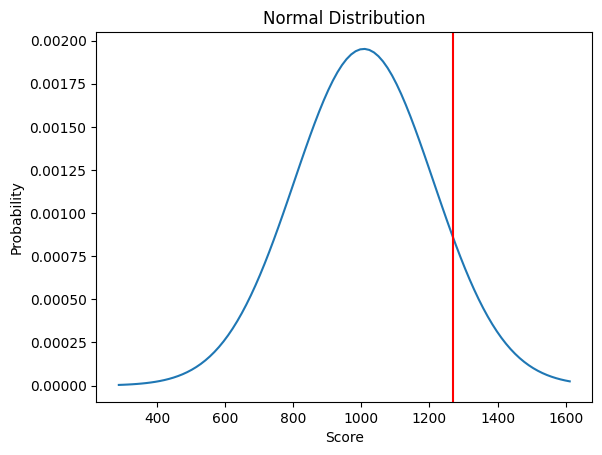

In [39]:
#plot the distribution
plt.plot(density['x'], density['pdf'])
plt.axvline(x=score_90th_percentile, color='r')
plt.xlabel('Score')
plt.ylabel('Probability')
plt.title('Normal Distribution')
plt.show()

#### Q4. Calculate the minimum marks a student must score to be in the top 5%.

In [41]:
# top 5% means minimum marks to get 95%, use norm.ppf()
score_top_five_percent = norm.ppf(0.95, mu, sigma)
print("The minimum score to be in top 5% should be", round(score_top_five_percent))

The minimum score to be in top 5% should be 1344


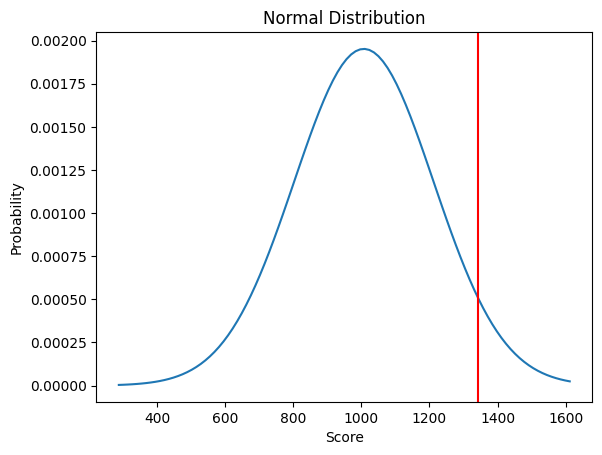

In [42]:
#plot the distribution
plt.plot(density['x'], density['pdf'])
plt.title('Normal Distribution')
plt.xlabel('Score')
plt.ylabel('Probability')
plt.axvline(x=score_top_five_percent, color='r')
plt.show()



#### Conclusion:

Only 15.51% of students will score below 800 and 7.62% of students will score above 1300. It shows that the 2020 SAT exam's complexity is moderate.

Students should score at least 1269 to secure the 90th percentile.

Students should score at least 1344 to be in the top 5%.